In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# set up lists to hold reponse info
lat = []
temp = []
cities_list = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    weather_response = requests.get(url + "&q=" + city).json()
    if (weather_response['cod'] != '404'):
        lat.append(weather_response['coord']['lat'])
        temp.append(weather_response['main']['temp'])
        cities_list.append(city)


In [4]:
#The number of selected cities should be at least 500:    
len(cities_list)

535

In [5]:
# create a data frame from cities, lat, and temp
lat_temp_dict = {
    "city": cities_list,
    "lat": lat,
    "temp (F)": temp
}
lat_temp = pd.DataFrame(lat_temp_dict)
lat_temp.head()

,city,lat,temp (F)
0,punta arenas,-53.16,28.40
1,chokurdakh,70.62,51.29
2,rikitea,-23.12,76.58
3,bethel,60.79,48.20
4,robertsport,6.75,75.77


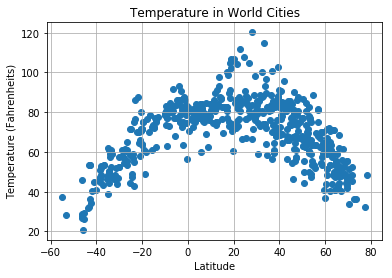

In [6]:
# Build a scatter plot 
plt.scatter(lat_temp["lat"], lat_temp["temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheits)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities2.png")

# Show plot
plt.show()

In [7]:
#Humidity (%) vs. Latitude
# set up a list to hold reponse info
humidity = []

# Loop through the list of cities and perform a request for data on each
for city in cities_list:
    weather_response = requests.get(url + "&q=" + city).json()
    humidity.append(weather_response['main']['humidity'])
    
    
# create a data frame from cities, lat, and humidity
lat_humidity_dic = {
    "city": cities_list,
    "lat": lat,
    "humidity (%)": humidity
}
lat_humidity = pd.DataFrame(lat_humidity_dic)
lat_humidity.head()


,city,lat,humidity (%)
0,punta arenas,-53.16,92
1,chokurdakh,70.62,75
2,rikitea,-23.12,99
3,bethel,60.79,100
4,robertsport,6.75,100


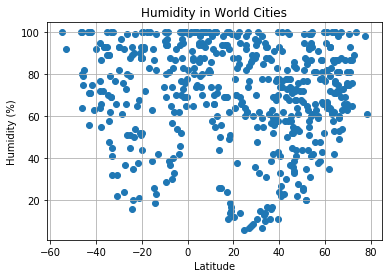

In [8]:
# Build a scatter plot 
plt.scatter(lat_humidity["lat"], lat_humidity["humidity (%)"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

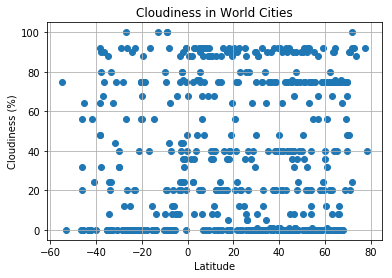

In [11]:
#Cloudiness (%) vs. Latitude
# set up a list to hold reponse info
cloudiness = []


# Loop through the list of cities and perform a request for data on each
for city in cities_list:
    weather_response = requests.get(url + "&q=" + city).json()
    if (weather_response['cod'] != '404'):
        cloudiness.append(weather_response['clouds']['all'])
    
    
# create a data frame from cities, lat, and cloudiness
lat_cloudiness_dic = {
    "city": cities_list,
    "lat": lat,
    "cloudiness (%)": cloudiness 
}
lat_cloudiness = pd.DataFrame(lat_cloudiness_dic)
#lat_cloudiness.head()

# Build a scatter plot
plt.scatter(lat_cloudiness["lat"], lat_cloudiness["cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

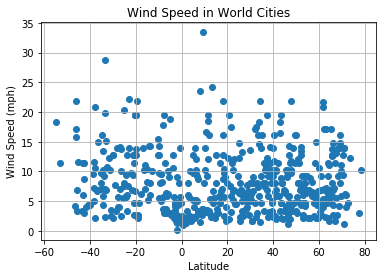

In [12]:
#Wind Speed (mph) vs. Latitude
# set up a list to hold reponse info
wind = []


# Loop through the list of cities and perform a request for data on each
for city in cities_list:
    weather_response = requests.get(url + "&q=" + city).json()
    wind.append(weather_response['wind']['speed'])
    
    
# create a data frame from cities, lat, and wind speed
lat_wind_dic = {
    "city": cities_list,
    "lat": lat,
    "wind speed (mph)": wind
}
lat_wind = pd.DataFrame(lat_wind_dic)

# Build a scatter plot for each data type
plt.scatter(lat_wind["lat"], lat_wind["wind speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()